importing the dependencies

In [207]:
import numpy as np
import pandas as pd
import seaborn as sns 
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn import svm
from sklearn.metrics import confusion_matrix,accuracy_score,mean_squared_error,r2_score,roc_auc_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold
sns.set()
plt.style.use("ggplot")
%matplotlib inline

In [208]:
#read the data set from dir
df=pd.read_csv("diabetes.csv")

In [209]:
#printing the first first 5 rows
df.head

<bound method NDFrame.head of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50 

In [210]:
# number of rows & columns in this dataset
df.shape

(768, 9)

In [211]:
#getting the statistical measures of the data
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: xlabel='Age', ylabel='Count'>

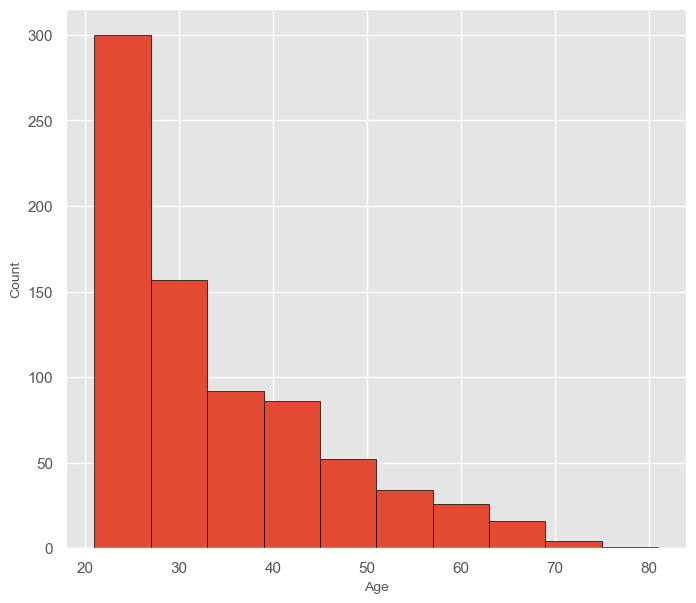

In [212]:
#plot the hist of the age variable
plt.figure(figsize=(8,7))
plt.xlabel('Age', fontsize=10)
plt.ylabel('Count', fontsize=10)
df['Age'].hist(edgecolor="black")

In [267]:
df['Age'].max()

81

In [269]:
df['Age'].min()

21

In [273]:
print("MAX AGE:"+str(df['Age'].max()))
print("MIN AGE:"+str(df['Age'].min()))

MAX AGE:81
MIN AGE:21


In [213]:
#outlier detection
#IQR+Q1
#50%
#24.65->25%+50%
#24.65->25%
for feature in df:
   Q1=df[feature].quantile(0.25)
   Q3=df[feature].quantile(0.75)
   IQR=Q3-Q1
   lower=Q1-1.5*IQR
   upper=Q3+1.5*IQR
   if df[(df[feature]>upper)].any(axis=None):
         print(feature,"yes")
   else:
       print(feature,"no")

Pregnancies yes
Glucose no
BloodPressure yes
SkinThickness yes
Insulin yes
BMI yes
DiabetesPedigreeFunction yes
Age yes
Outcome no


In [214]:
sns.pairplot

<function seaborn.axisgrid.pairplot(data, *, hue=None, hue_order=None, palette=None, vars=None, x_vars=None, y_vars=None, kind='scatter', diag_kind='auto', markers=None, height=2.5, aspect=1, corner=False, dropna=False, plot_kws=None, diag_kws=None, grid_kws=None, size=None)>

In [215]:
#how to detect the out layer
Q1=df.Insulin.quantile(0.25)
Q3=df.Insulin.quantile(0.75)
IQR=Q3-Q1
lower=Q1-1.5*IQR
upper=Q3+1.5*IQR
df.loc[df['Insulin']>upper,"Insulin"]=upper

C:\Users\prath\AppData\Local\Temp\ipykernel_13536\2316015034.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '318.125' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['Insulin']>upper,"Insulin"]=upper


<Axes: xlabel='Insulin'>

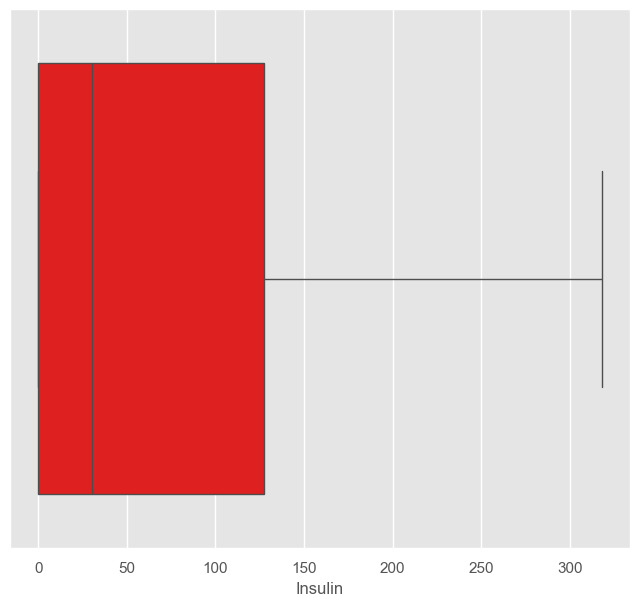

In [216]:
plt.figure(figsize=(8,7))
sns.boxplot(x=df["Insulin"],color="red")

In [217]:
#LOF(local outlier factor)
from sklearn.neighbors import LocalOutlierFactor
lof=LocalOutlierFactor(n_neighbors=10)
lof.fit_predict(df)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [218]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0.0,33.6,0.627,50,1
1,1,85,66,29,0.0,26.6,0.351,31,0
2,8,183,64,0,0.0,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1


<Axes: xlabel='SkinThickness'>

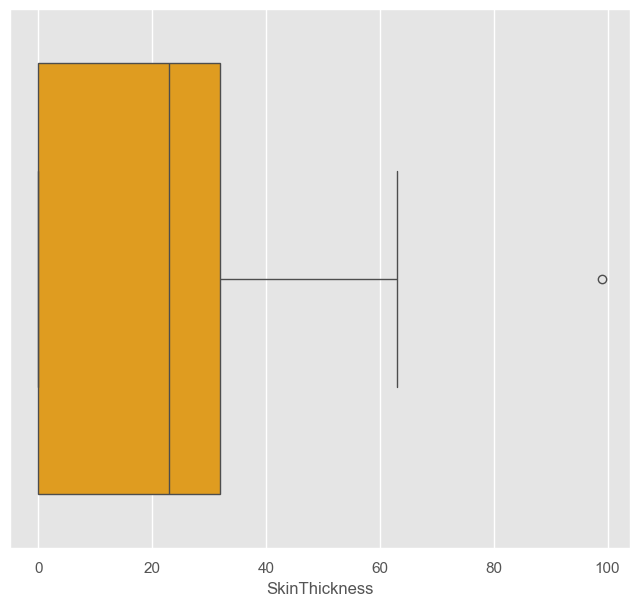

In [219]:
plt.figure(figsize=(8,7))
sns.boxplot(x=df["SkinThickness"],color="orange")

<Axes: xlabel='Pregnancies'>

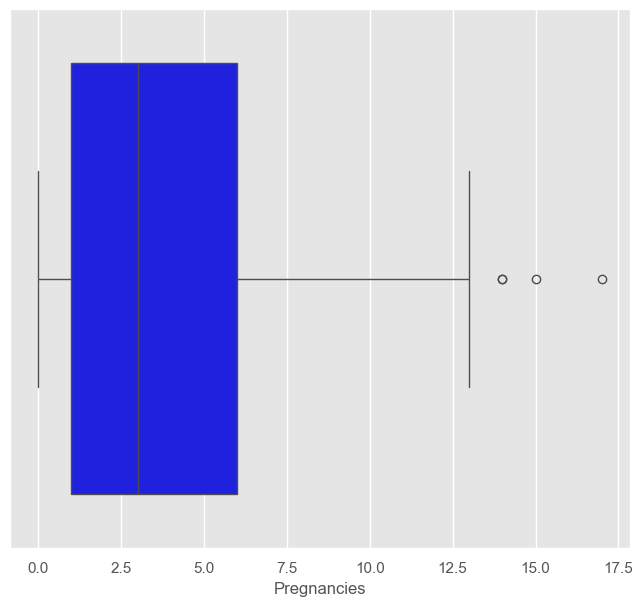

In [220]:
plt.figure(figsize=(8,7))
sns.boxplot(x=df["Pregnancies"],color="Blue")

In [221]:
df_scores=lof.negative_outlier_factor_
np.sort(df_scores[0:20])

array([-1.80857804, -1.54285259, -1.17815489, -1.16076958, -1.15070785,
       -1.11411685, -1.10231677, -1.082585  , -1.06416794, -1.05435109,
       -1.03899055, -1.00728737, -1.00717715, -1.00250005, -1.00194191,
       -0.99178362, -0.97715116, -0.97320471, -0.95995266, -0.95047787])

In [222]:
thresold=np.sort(df_scores)[7]

In [223]:
thresold

-1.9160129109052675

In [224]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0.0,33.6,0.627,50,1
1,1,85,66,29,0.0,26.6,0.351,31,0
2,8,183,64,0,0.0,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1


In [225]:
df.shape

(768, 9)

In [226]:
#Feature Enginnering
NewBMI= pd.Series(["Underweight","Normal","Overweight","Obesity 1","Obesity 2","Obesity 3"],dtype="category")

In [227]:
NewBMI

0    Underweight
1         Normal
2     Overweight
3      Obesity 1
4      Obesity 2
5      Obesity 3
dtype: category
Categories (6, object): ['Normal', 'Obesity 1', 'Obesity 2', 'Obesity 3', 'Overweight', 'Underweight']

In [228]:
df['NewBMI']=NewBMI
df.loc[df["BMI"]<18.5,"NewBMI"]=NewBMI[0]
df.loc[(df["BMI"]>18.5) & df["BMI"]<=24.9,"NewBMI"]=NewBMI[1]
df.loc[(df["BMI"]>24.9) & df["BMI"]<=29.9,"NewBMI"]=NewBMI[2]
df.loc[(df["BMI"]>29.9) & df["BMI"]<=34.9,"NewBMI"]=NewBMI[3]
df.loc[(df["BMI"]>34.9) & df["BMI"]<=39.9,"NewBMI"]=NewBMI[4]
df.loc[df["BMI"]>39.9,"NewBMI"]=NewBMI[5]

In [229]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI
0,6,148,72,35,0.0,33.6,0.627,50,1,Obesity 2
1,1,85,66,29,0.0,26.6,0.351,31,0,Obesity 2
2,8,183,64,0,0.0,23.3,0.672,32,1,Obesity 2
3,1,89,66,23,94.0,28.1,0.167,21,0,Obesity 2
4,0,137,40,35,168.0,43.1,2.288,33,1,Obesity 3


In [230]:
#if insulin>=16 & insulin<=-->normal
def set_insulin(row):
    if row["Insulin"]>=16 and row["Insulin"]<=166:
        return"Normal"
    else:
        return"Abnormal"

In [231]:
df = df.assign(NewInsulinScore=df.apply(set_insulin, axis=1))

In [232]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore
0,6,148,72,35,0.0,33.6,0.627,50,1,Obesity 2,Abnormal
1,1,85,66,29,0.0,26.6,0.351,31,0,Obesity 2,Abnormal
2,8,183,64,0,0.0,23.3,0.672,32,1,Obesity 2,Abnormal
3,1,89,66,23,94.0,28.1,0.167,21,0,Obesity 2,Normal
4,0,137,40,35,168.0,43.1,2.288,33,1,Obesity 3,Abnormal


In [233]:
#some intervals were determined according to the glucose variable and these were assigned categorial
NewGlucose = pd.Series(["Low", "Normal", "Overweight", "Secret", "High"],dtype="category")
df["NewGlucose"] = NewGlucose
df.loc[df["Glucose"] <=70,"NewGlucose"] =NewGlucose[0]
df.loc[(df["Glucose"] > 70)&(df["Glucose"]<=99),"NewGlucose"]=NewGlucose[1]
df.loc[(df["Glucose"] > 99)&(df["Glucose"]<=126),"NewGlucose"]=NewGlucose[2]
df.loc[df["Glucose"] >=126,"NewGlucose"] =NewGlucose[3]

In [234]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore,NewGlucose
0,6,148,72,35,0.0,33.6,0.627,50,1,Obesity 2,Abnormal,Secret
1,1,85,66,29,0.0,26.6,0.351,31,0,Obesity 2,Abnormal,Normal
2,8,183,64,0,0.0,23.3,0.672,32,1,Obesity 2,Abnormal,Secret
3,1,89,66,23,94.0,28.1,0.167,21,0,Obesity 2,Normal,Normal
4,0,137,40,35,168.0,43.1,2.288,33,1,Obesity 3,Abnormal,Secret


In [235]:
print (df.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'NewBMI',
       'NewInsulinScore', 'NewGlucose'],
      dtype='object')
